## Zomato Restaurant Price Prediction

In [57]:
#Import the important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [3]:
#Import the csv file and read the first five rows
zomato_df=pd.read_csv("zomato.csv")
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
#Check the df information, number of rows and columns and missing values
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

##### Columns : Rate, Phone, location,rest_type, dish tye, cuisines, approx_cost have missing values

In [5]:
#Get the duplicates
zomato_df.duplicated().sum()
#Remove duplicates
zomato_df.dropna(how='any',inplace=True)

In [6]:
#Check the df after removing duplicates
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23193 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          23193 non-null  object
 1   address                      23193 non-null  object
 2   name                         23193 non-null  object
 3   online_order                 23193 non-null  object
 4   book_table                   23193 non-null  object
 5   rate                         23193 non-null  object
 6   votes                        23193 non-null  int64 
 7   phone                        23193 non-null  object
 8   location                     23193 non-null  object
 9   rest_type                    23193 non-null  object
 10  dish_liked                   23193 non-null  object
 11  cuisines                     23193 non-null  object
 12  approx_cost(for two people)  23193 non-null  object
 13  reviews_list                 23

In [7]:
#Reading the columns
zomato_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [41]:
#Removing some unnecessary columns
zomato=zomato_df.drop(['url','dish_liked','phone'],axis=1)
#checking the new df after transformation
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [42]:
#Renaming some of the columns
zomato=zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23193 entries, 0 to 51715
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       23193 non-null  object
 1   name          23193 non-null  object
 2   online_order  23193 non-null  object
 3   book_table    23193 non-null  object
 4   rate          23193 non-null  object
 5   votes         23193 non-null  int64 
 6   location      23193 non-null  object
 7   rest_type     23193 non-null  object
 8   cuisines      23193 non-null  object
 9   cost          23193 non-null  object
 10  reviews_list  23193 non-null  object
 11  menu_item     23193 non-null  object
 12  type          23193 non-null  object
 13  city          23193 non-null  object
dtypes: int64(1), object(13)
memory usage: 2.7+ MB


In [43]:
#Some more Transformations
zomato['cost']

0          800
1          800
2          800
3          300
4          600
         ...  
51705    1,200
51707    2,000
51708    1,200
51711      800
51715    2,500
Name: cost, Length: 23193, dtype: object

In [44]:
#As cost column has ',' in the values, we need to transform it
zomato['cost']=zomato['cost'].astype('str')
#Replace ',' to '.' using lambda function
zomato['cost']=zomato['cost'].apply(lambda x: x.replace(',','.'))
#Convert cost into float                                    
zomato['cost']=zomato['cost'].astype('float')

In [45]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23193 entries, 0 to 51715
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       23193 non-null  object 
 1   name          23193 non-null  object 
 2   online_order  23193 non-null  object 
 3   book_table    23193 non-null  object 
 4   rate          23193 non-null  object 
 5   votes         23193 non-null  int64  
 6   location      23193 non-null  object 
 7   rest_type     23193 non-null  object 
 8   cuisines      23193 non-null  object 
 9   cost          23193 non-null  float64
 10  reviews_list  23193 non-null  object 
 11  menu_item     23193 non-null  object 
 12  type          23193 non-null  object 
 13  city          23193 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.7+ MB


In [46]:
#Reading unique values from the Rate column
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [47]:
#Check the rating column and transform it
zomato=zomato.loc[zomato.rate!='NEW']
zomato=zomato.loc[zomato.rate!='-'].reset_index(drop=True)
remove_slash=lambda x: x.replace('/5','') if type(x)==np.str else x
zomato.rate=zomato.rate.apply(remove_slash).str.strip().astype('float')

In [48]:
#Verifying unique values from the Rate column
zomato['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [49]:
#Some more transformations and change column name
zomato.name=zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True,False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True,False),inplace=True)
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [50]:
#Original df
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [51]:
zomato.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 750.  , 200.  , 850.  ,   1.2 , 150.  , 350.  , 250.  ,
         1.5 ,   1.3 ,   1.  , 100.  , 900.  ,   1.1 ,   1.6 , 950.  ,
       230.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,   1.8 ,   1.9 ,
       180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,   3.4 ,  40.  ,
         1.25,   3.5 ,   4.  ,   2.4 ,   1.45,   3.2 ,   6.  ,   1.05,
         4.1 ,   2.3 , 120.  ,   2.6 ,   5.  ,   3.7 ,   1.65,   2.7 ,
         4.5 ])

In [54]:
#Encode the input variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate','votes','cost'])]:
        zomato[column]=zomato[column].factorize()[0]
    return zomato
    
zomato_enc=Encode(zomato.copy())
zomato_enc.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


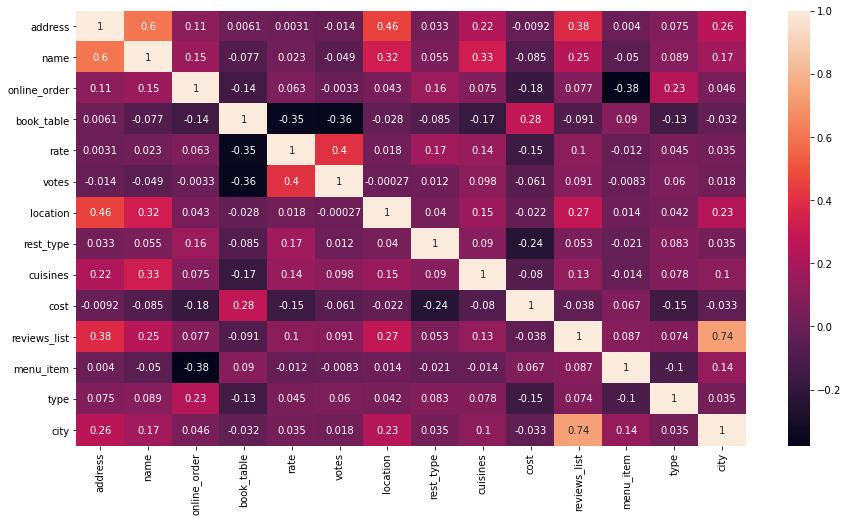

In [58]:
#Get correlation between the variables
corr=zomato_enc.corr(method="kendall")
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

##### Maximum correlation between reviews_list and city which is 0.74

### Regression Analysis

#### Splitting the dataset

In [64]:
X=zomato_enc.drop(['address','name','rate','reviews_list','type','city'],axis=1)
y=zomato_enc['rate']
#Getting the training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

In [65]:
X_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
632,1,1,125,9,4,181,500.0,0
13771,0,1,616,47,0,1080,500.0,0
17017,1,1,3589,33,4,551,900.0,0
1470,0,0,36,2,0,130,650.0,0
19484,0,1,660,43,2,208,600.0,0


In [66]:
y_train.head()

632      3.9
13771    4.1
17017    4.5
1470     3.7
19484    4.0
Name: rate, dtype: float64

In [72]:
#Get the unique values for each column
for column in X_train.columns:
    print("\n",column,"unique values:")
    print(X_train[column].unique())


 online_order unique values:
[1 0]

 book_table unique values:
[1 0]

 votes unique values:
[ 125  616 3589 ... 2275 2355 2264]

 location unique values:
[ 9 47 33  2 43 23 28 65 48 53 13 10 20 44 11 34 54 59  1 22 19 37 38 79
 21 78  0 31 36 18 83 26 25 75 30 66 27 17 15 49 29 14 45 41 50 63 60 39
 76  7 62 73 80  8 68 71 69 74 77 81 40 32 84 46 67 58 51 64 82 55 12 42
  3 35 57 52 70  6 56 24  4 61 16  5 72 86 85]

 rest_type unique values:
[ 4  0  2 27  6 10 16  3  7 18 43 41  1 39 21 20 45 17 28 66 19 13 33 38
 15  9 61 22 35 14 37 23  8 71 44 31 11  5 30 40 42 24 50 34 32 46 69 12
 25 55 36 48 29 53 58 47 68 49 60 26 51 64 65 52 57 62 59 67 63 70 54 56
 72]

 cuisines unique values:
[ 181 1080  551 ...  222 1339  785]

 cost unique values:
[500.   900.   650.   600.   300.   750.   800.     1.4    1.3  700.
 350.     1.1    1.   400.   550.   200.     1.5  450.   150.     1.2
   1.6  250.     2.     4.     3.     2.8    1.7    1.8   40.   100.
   1.9    1.65   4.1    2.1  850.   

### Data Visualization

#### Resturants delivering online or not

Text(0.5, 1.0, 'Resturants delivering online or not')

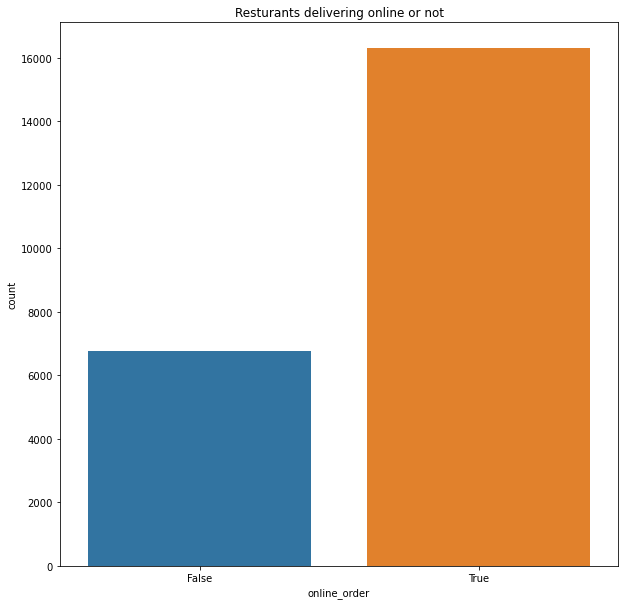

In [73]:
fig=plt.gcf()
sns.countplot(zomato['online_order'])
fig.set_size_inches(10,10)
plt.title("Resturants delivering online or not")

#### Restaurants taking table booking or not

Text(0.5, 1.0, 'Resturants taking Table Booking or not')

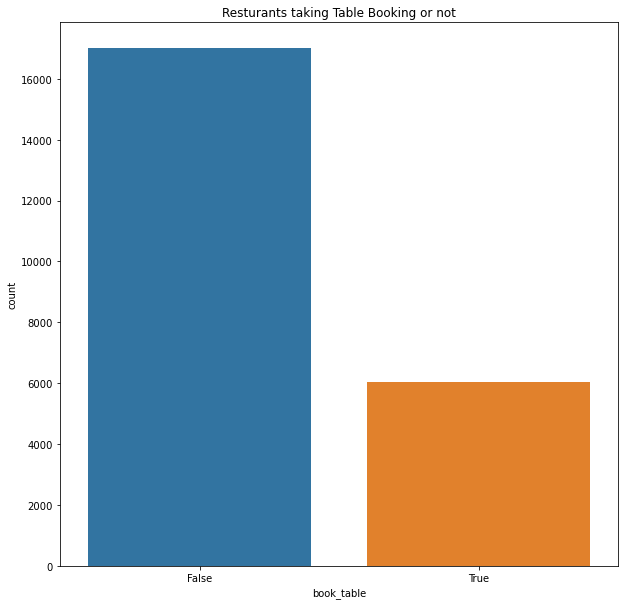

In [74]:
fig=plt.gcf()
sns.countplot(zomato['book_table'])
fig.set_size_inches(10,10)
plt.title("Resturants taking Table Booking or not")

#### Table booking rate vs normal rate

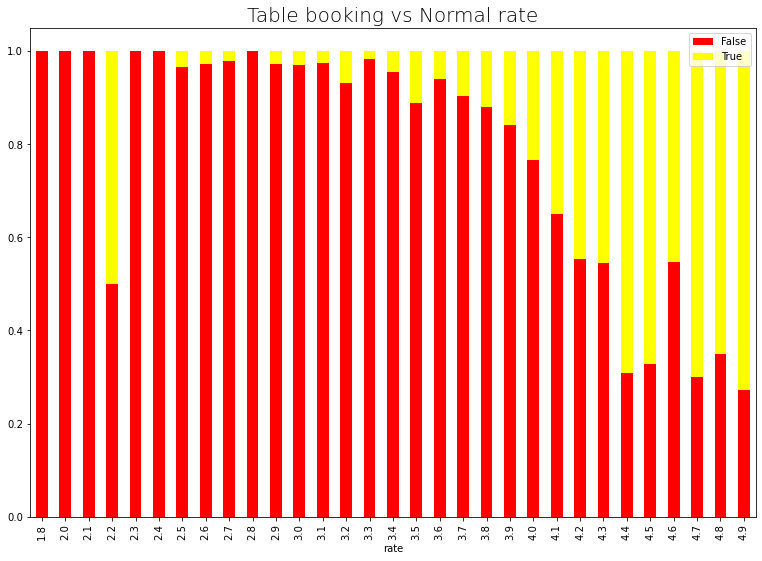

In [76]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(zomato['rate'], zomato['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('Table booking vs Normal rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

#### Location

Text(0.5, 1.0, 'Location wise count for restaurants')

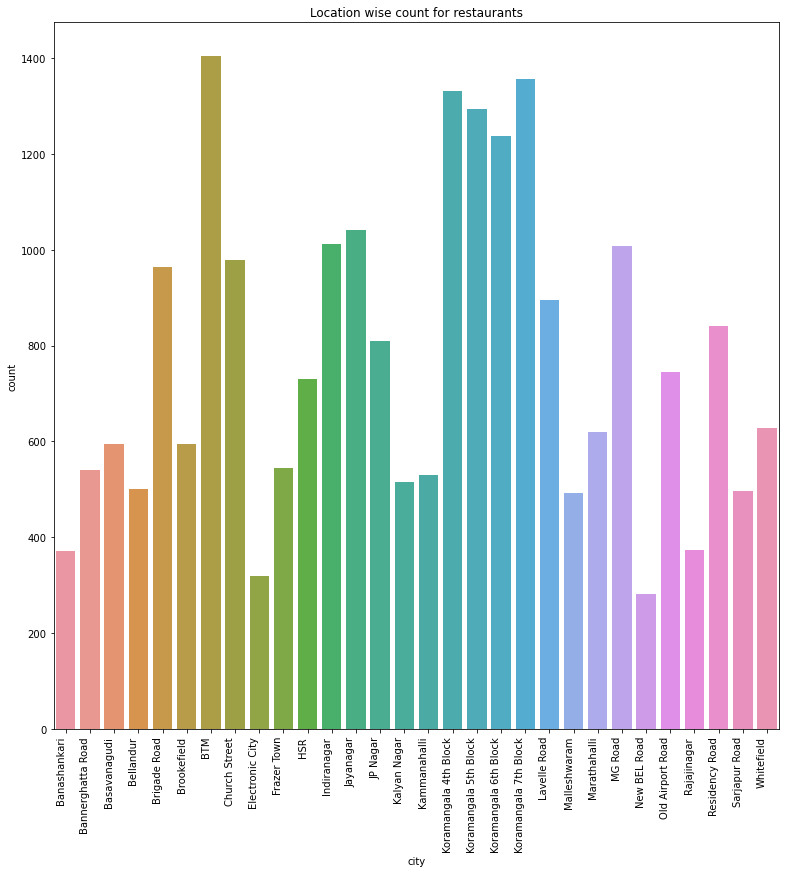

In [77]:
sns.countplot(zomato['city'])
sns.countplot(zomato['city']).set_xticklabels(sns.countplot(zomato['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for Restaurants')

#### Location and Rating

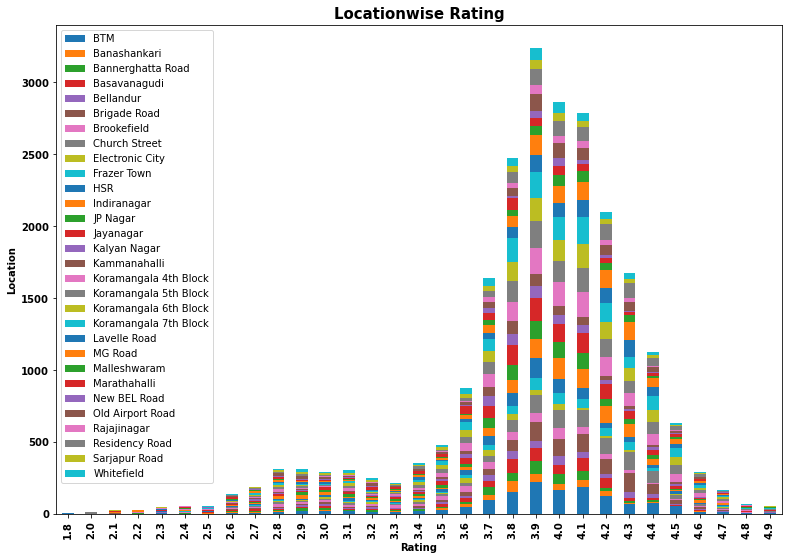

In [78]:
loc_plt=pd.crosstab(zomato['rate'],zomato['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend();

#### Restaurants Type

Text(0.5, 1.0, 'Restuarant Type')

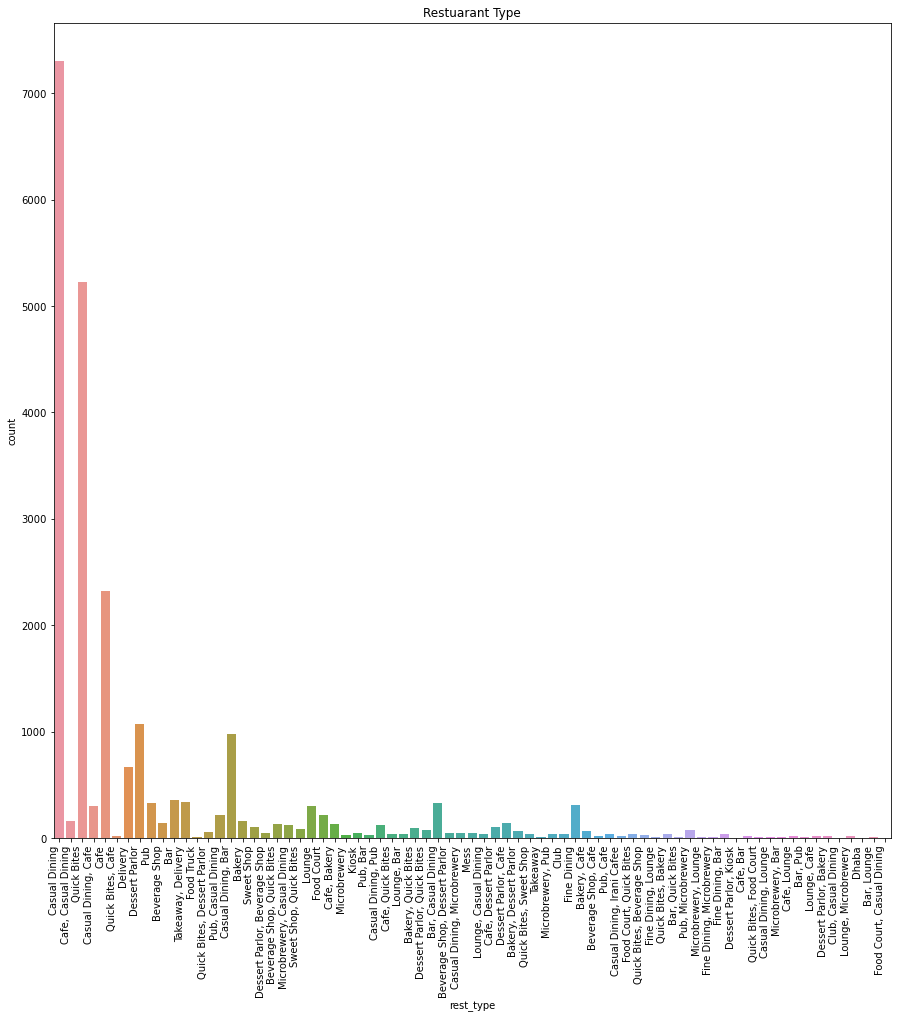

In [79]:
sns.countplot(zomato['rest_type'])
sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')

### Gausian Rest Type and Rating

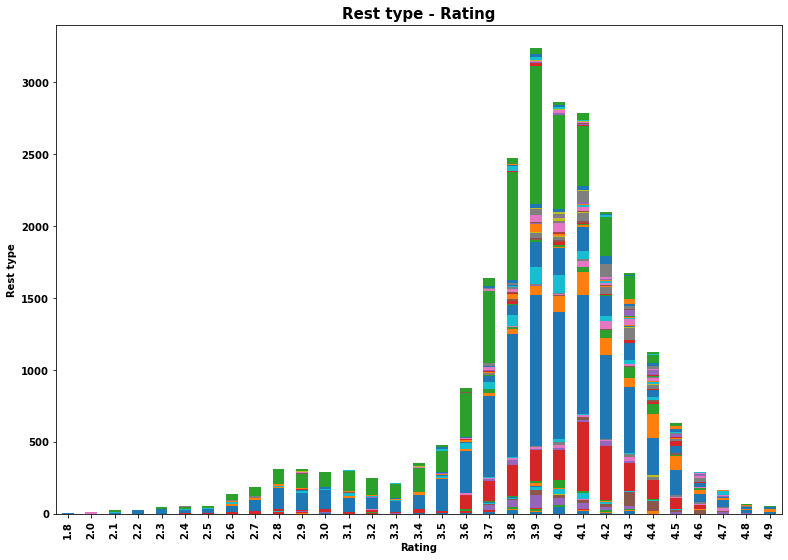

In [80]:
loc_plt=pd.crosstab(zomato['rate'],zomato['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

### Types of Service

Text(0.5, 1.0, 'Type of Service')

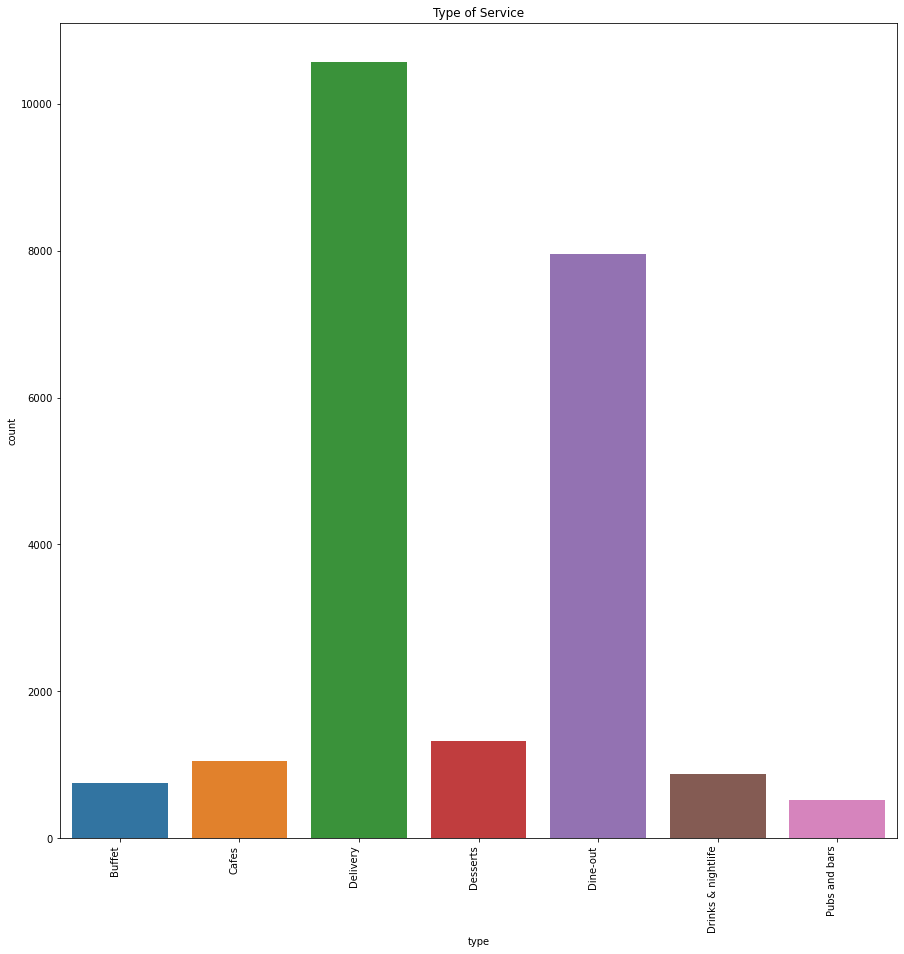

In [81]:
sns.countplot(zomato['type'])
sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

#### Type and Rating

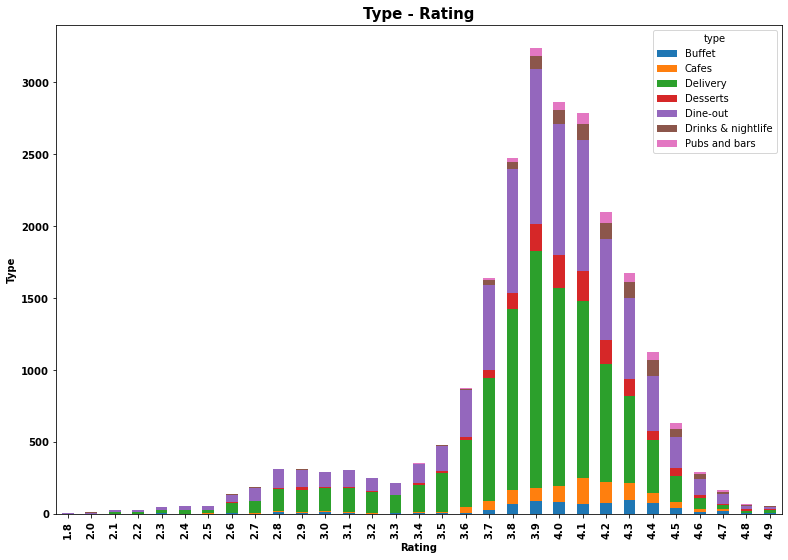

In [82]:
type_plt=pd.crosstab(zomato['rate'],zomato['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

#### Cost in Resturant

Text(0.5, 1.0, 'Cost of Restuarant')

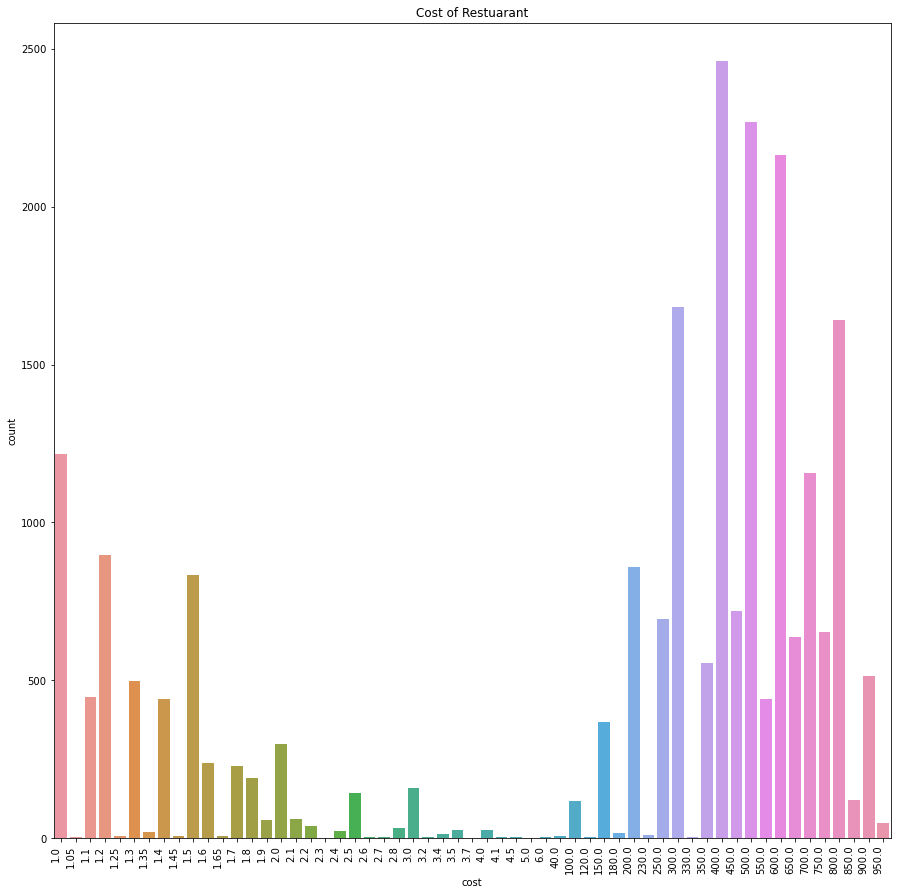

In [83]:
sns.countplot(zomato['cost'])
sns.countplot(zomato['cost']).set_xticklabels(sns.countplot(zomato['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

#### No of Restaurants in a location

Text(0.5, 1.0, 'Restaurant types')

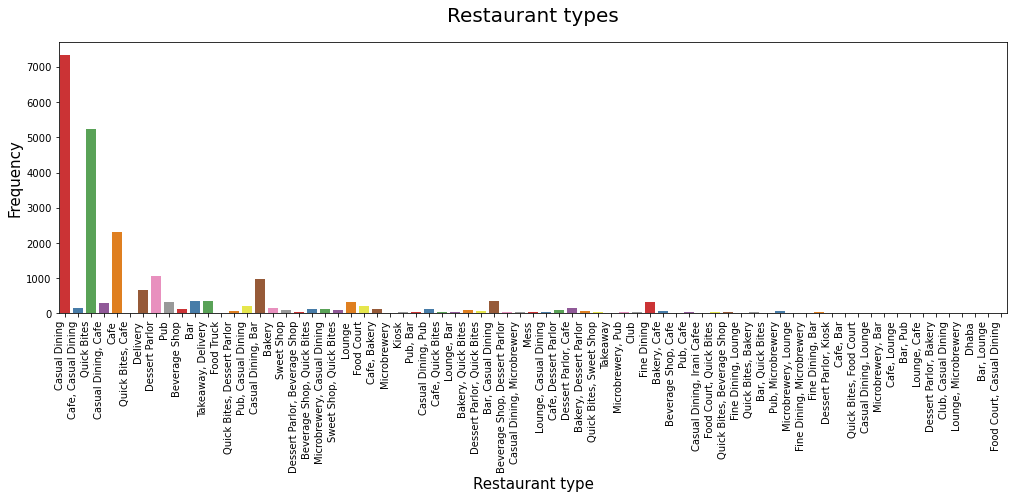

In [87]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=zomato_df, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

#### Most famous Restaurant chain in Bangalore

Text(0.5, 0, 'Number of outlets')

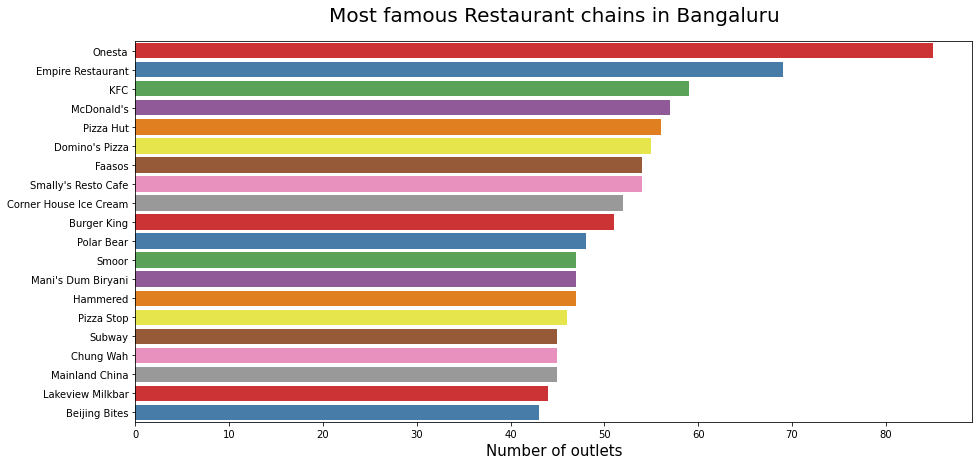

In [90]:
plt.figure(figsize=(15,7))
chains=zomato_df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous Restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

### Linear Regression

In [91]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print(r2_score(y_test,y_pred))

0.2319934406442994


### Decision Tree Regression

In [92]:
from sklearn.tree import DecisionTreeRegressor


In [97]:
dtree=DecisionTreeRegressor(min_samples_leaf=.0001)
dtree.fit(X_train,y_train)
y_predict=dtree.predict(X_test)
print(r2_score(y_test,y_predict))

0.814945765330067


### Random Forest Regression

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
rf=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(r2_score(y_test,y_pred))

0.8869506960368634


### Extra Tree Regressor

In [100]:
from sklearn.ensemble import ExtraTreesRegressor

In [102]:
etree=ExtraTreesRegressor(n_estimators=100)
etree.fit(X_train,y_train)
y_pred=etree.predict(X_test)
print(r2_score(y_test,y_pred))

0.9258542403866875


### Saving the model

In [103]:
import pickle

In [104]:
pickle.dump(etree, open('zomatomodel.pkl','wb'))

##### We can see that ExtraTreeRegressor Model has the best accuracy